In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
keras = tf.keras

c:\users\aakaas~1\docume~1\nyu\projects\speech~1\env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from src.utils import DatasetUtils
utils = DatasetUtils()
encoder = utils.get_label_encoder()

In [3]:
test_data, test_labels = utils.get_dataset_and_encoded_labels('test_data.npy', 'test_labels.npy')
test_data_unrolled = np.load('./data/test_labels_unrolled.npy')

In [4]:
arch1 = keras.models.load_model('./models/arch1_100e_512b.h5')
arch2 = keras.models.load_model('./models/arch2_100e_512b.h5')
arch3 = keras.models.load_model('./models/arch3_100e_512b.h5')

In [5]:
arch1_loss, arch1_acc = arch1.evaluate(test_data, test_labels)
print('test loss: {} - test accuracy: {}'.format(arch1_loss, arch1_acc))

6835/6835 [==============================] - 9s 1ms/step
test loss: 0.5097295050736144 - test accuracy: 0.8711046086930845


In [6]:
arch2_loss, arch2_acc = arch2.evaluate(test_data, test_labels)
print('test loss: {} - test accuracy: {}'.format(arch2_loss, arch2_acc))

6835/6835 [==============================] - 13s 2ms/step
test loss: 0.4902414064164919 - test accuracy: 0.8721287490419863


In [7]:
arch3_loss, arch3_acc = arch3.evaluate(test_data, test_labels)
print('test loss: {} - test accuracy: {}'.format(arch3_loss, arch3_acc))

6835/6835 [==============================] - 29s 4ms/step
test loss: 0.6796240019684913 - test accuracy: 0.8316020483419506


In [8]:
arch1_pred = arch1.predict(test_data)
arch2_pred = arch2.predict(test_data)
arch3_pred = arch3.predict(test_data)

In [9]:
arch1_classes = np.argmax(arch1_pred, axis=-1)
arch2_classes = np.argmax(arch2_pred, axis=-1)
arch3_classes = np.argmax(arch3_pred, axis=-1)

In [10]:
arch1_labels = encoder.classes_[arch1_classes]
arch2_labels = encoder.classes_[arch2_classes]
arch3_labels = encoder.classes_[arch3_classes]

In [11]:
labels = np.argmax(test_labels, axis=-1)
labels = encoder.classes_[labels]

In [12]:
print(classification_report(labels, arch1_labels))

             precision    recall  f1-score   support

       down       0.93      0.81      0.87       253
      eight       0.95      0.81      0.88       257
       five       0.84      0.89      0.86       271
       four       0.97      0.86      0.91       253
         go       0.91      0.77      0.83       251
       left       0.89      0.90      0.89       267
       nine       0.91      0.90      0.91       259
         no       0.92      0.82      0.86       252
        off       0.89      0.84      0.86       262
         on       0.97      0.87      0.92       246
        one       0.95      0.86      0.90       248
      right       0.94      0.85      0.89       259
      seven       0.90      0.92      0.91       239
        six       0.88      0.89      0.88       244
       stop       0.86      0.89      0.88       249
      three       0.88      0.67      0.76       267
        two       0.97      0.87      0.92       264
    unknown       0.78      0.95      0.85   

In [13]:
print(classification_report(labels, arch2_labels))

             precision    recall  f1-score   support

       down       0.93      0.81      0.87       253
      eight       0.94      0.86      0.89       257
       five       0.88      0.90      0.89       271
       four       0.93      0.87      0.90       253
         go       0.94      0.74      0.83       251
       left       0.89      0.82      0.85       267
       nine       0.91      0.93      0.92       259
         no       0.91      0.83      0.87       252
        off       0.84      0.85      0.85       262
         on       0.94      0.92      0.93       246
        one       0.94      0.87      0.91       248
      right       0.96      0.83      0.89       259
      seven       0.98      0.89      0.93       239
        six       0.95      0.86      0.90       244
       stop       0.95      0.86      0.90       249
      three       0.83      0.66      0.73       267
        two       0.95      0.87      0.91       264
    unknown       0.76      0.96      0.85   

In [14]:
print(classification_report(labels, arch3_labels))

             precision    recall  f1-score   support

       down       0.85      0.81      0.83       253
      eight       0.92      0.81      0.86       257
       five       0.88      0.82      0.85       271
       four       0.86      0.83      0.84       253
         go       0.73      0.69      0.71       251
       left       0.85      0.82      0.84       267
       nine       0.79      0.85      0.82       259
         no       0.84      0.77      0.81       252
        off       0.81      0.83      0.82       262
         on       0.87      0.83      0.85       246
        one       0.88      0.83      0.86       248
      right       0.85      0.75      0.80       259
      seven       0.81      0.87      0.84       239
        six       0.86      0.86      0.86       244
       stop       0.85      0.82      0.84       249
      three       0.81      0.73      0.77       267
        two       0.89      0.86      0.88       264
    unknown       0.79      0.89      0.84   

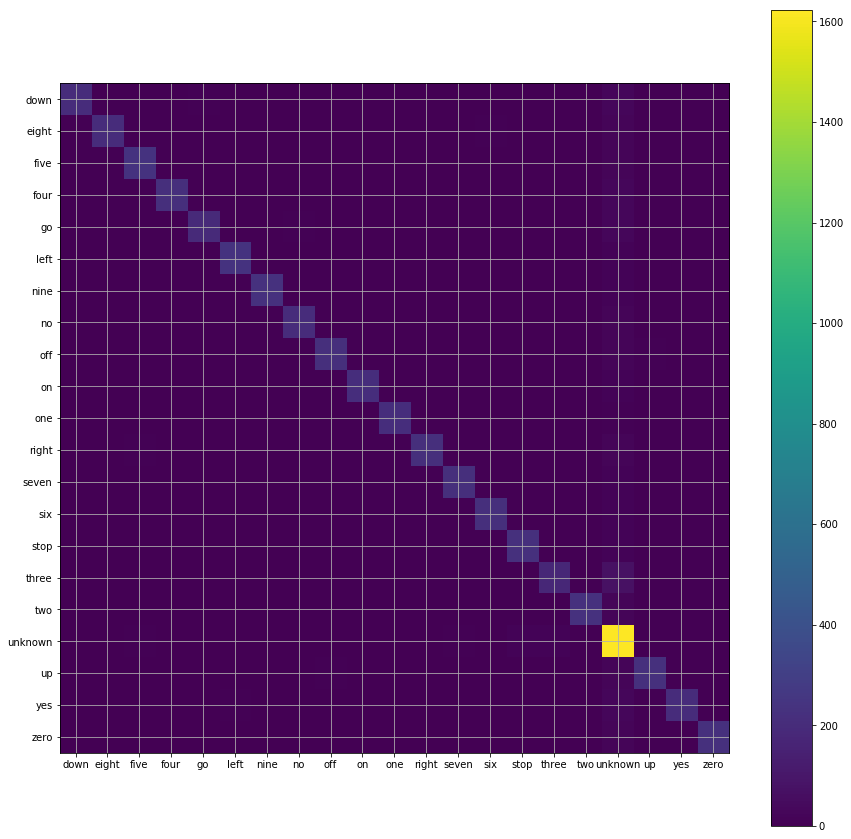

In [15]:
plt.figure(figsize=(15, 15))
plt.imshow(confusion_matrix(labels, arch1_labels))
plt.xticks(range(len(encoder.classes_)), encoder.classes_)
plt.yticks(range(len(encoder.classes_)), encoder.classes_)
plt.colorbar()
plt.show()

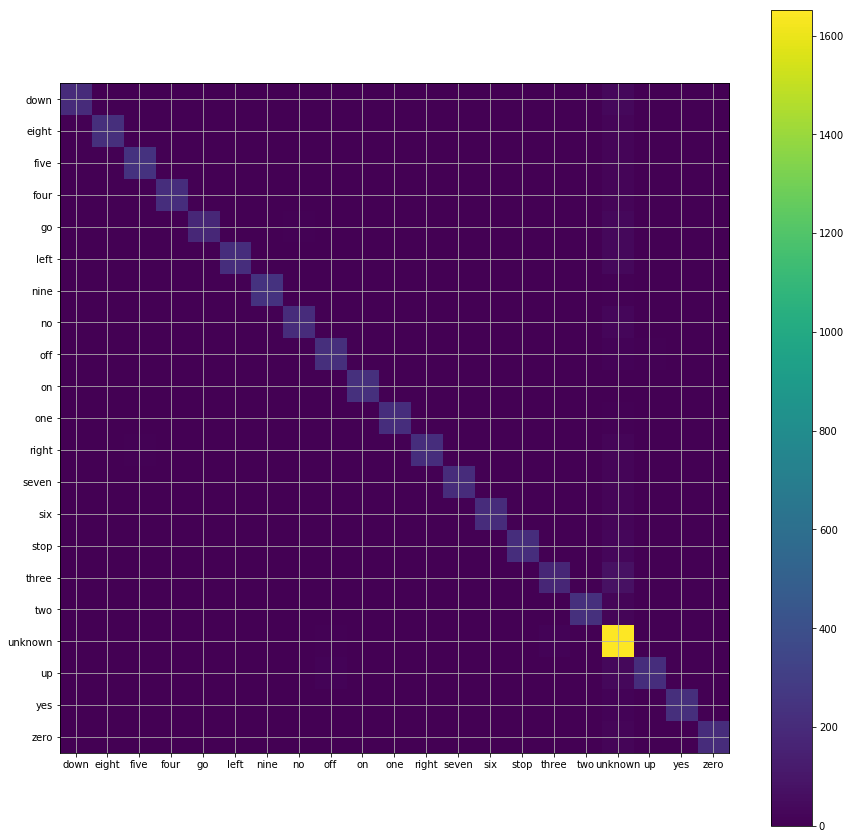

In [16]:
plt.figure(figsize=(15, 15))
plt.imshow(confusion_matrix(labels, arch2_labels))
plt.xticks(range(len(encoder.classes_)), encoder.classes_)
plt.yticks(range(len(encoder.classes_)), encoder.classes_)
plt.colorbar()
plt.show()

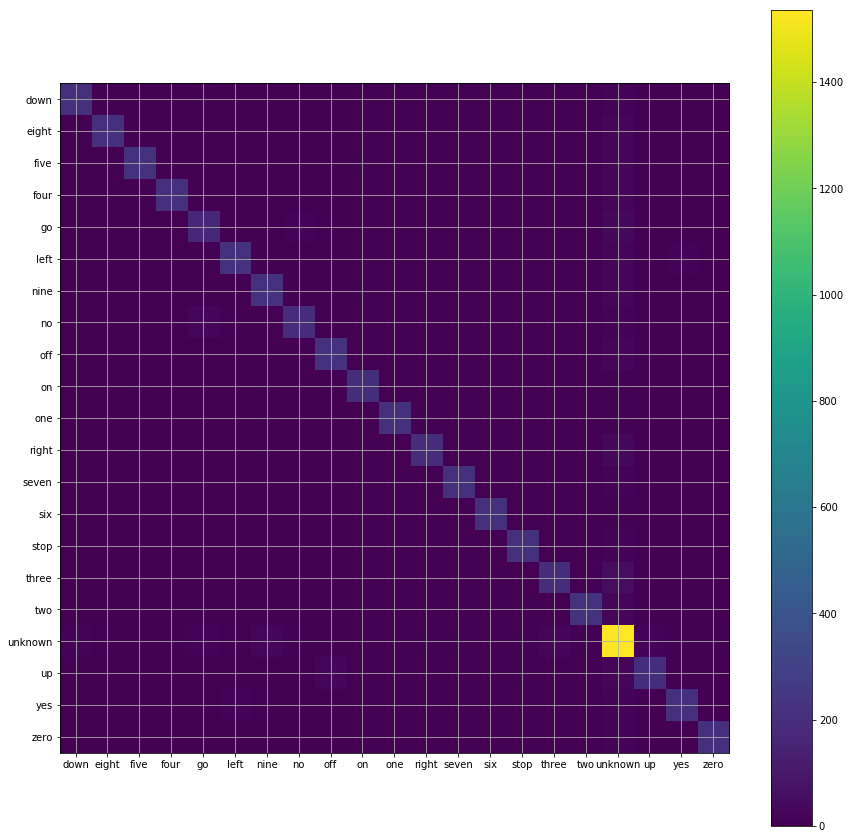

In [17]:
plt.figure(figsize=(15, 15))
plt.imshow(confusion_matrix(labels, arch3_labels))
plt.xticks(range(len(encoder.classes_)), encoder.classes_)
plt.yticks(range(len(encoder.classes_)), encoder.classes_)
plt.colorbar()
plt.show()